Import relevant Libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

Read all files

In [2]:
# Major file, inside here we have id_major	id_university	type	major_name	capacity columns
majors = pd.read_csv('majors.csv')
print(majors.isna().sum()) #check for some null 
majors.sample(5)

Unnamed: 0       0
id_major         0
id_university    0
type             0
major_name       0
capacity         0
dtype: int64


,Unnamed: 0,id_major,id_university,type,major_name,capacity
1790,1790,1212131,121,humanities,SASTRA DAERAH UNTUK SASTRA MELAYU,36
1702,1702,9211294,921,science,PENDIDIKAN KIMIA,16
1406,1406,7131011,713,science,MATEMATIKA,45
787,787,3611155,361,science,FISIKA,32
846,846,3631016,363,science,TEKNIK GEOLOGI,78


In [3]:
# we have id_university and the name of the university 
universities = pd.read_csv('universities.csv')
print(universities.isna().sum()) #check some null 
universities.sample(5)

Unnamed: 0         0
id_university      0
university_name    0
dtype: int64


,Unnamed: 0,id_university,university_name
32,32,336,UNIVERSITAS ISLAM NEGERI SUNAN GUNUNG DJATI
51,51,381,UNIVERSITAS AIRLANGGA
12,12,141,UNIVERSITAS ANDALAS
80,80,821,UNIVERSITAS KHAIRUN
38,38,354,ISI SURAKARTA


In [4]:
# in here we have all the test score from humanities
score_humanities = pd.read_csv('score_humanities.csv')
print(score_humanities.isna().sum()) #check some null 
score_humanities.sample(5)

Unnamed: 0              0
id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
id_user                 0
score_eko               0
score_geo               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
score_sej               0
score_sos               0
dtype: int64


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
10046,10046,3332016,333,3512014,351,73449,647,568,553,692,415,470,653,458,301
22469,22469,3322014,332,3812033,381,151095,691,731,643,639,651,656,779,640,698
3197,3197,3212146,321,3232015,323,26563,569,403,662,524,488,652,575,558,657
36808,36808,5312124,531,5312066,531,224210,468,617,499,528,443,461,515,627,492
11006,11006,3242056,324,3242041,324,80274,702,634,644,557,423,285,685,563,702


In [5]:
# we have all the test score from science
score_science = pd.read_csv('score_science.csv')
print(score_science.isna().sum()) #check some null 
score_science.sample(5)

Unnamed: 0              0
id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
id_user                 0
score_bio               0
score_fis               0
score_kim               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
dtype: int64


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
37867,37867,3211015,321,3221106,322,159606,581,801,608,605,660,627,682,603
76110,76110,6211224,621,3741124,374,302585,450,493,641,604,621,461,398,627
12191,12191,3411385,341,1311264,131,59400,434,601,530,502,557,745,516,553
52433,52433,3721015,372,3511057,351,213993,334,572,548,467,470,628,527,533
27772,27772,3221114,322,3241061,324,118667,614,514,792,603,676,641,525,635


there is no missing data in any of these files, so we can continue to merge some files

In [6]:
major_univ = pd.merge(left=universities[['id_university','university_name']],right=majors[['id_major','major_name','id_university','capacity']],on='id_university')
major_univ # we have merged our data, so it will be easier to be read

,id_university,university_name,id_major,major_name,capacity
0,111,UNIVERSITAS SYIAH KUALA,1111014,PENDIDIKAN DOKTER HEWAN,88
1,111,UNIVERSITAS SYIAH KUALA,1111022,TEKNIK SIPIL,64
2,111,UNIVERSITAS SYIAH KUALA,1111037,TEKNIK MESIN,48
3,111,UNIVERSITAS SYIAH KUALA,1111045,TEKNIK KIMIA,48
4,111,UNIVERSITAS SYIAH KUALA,1111053,ARSITEKTUR,48
...,...,...,...,...,...
3162,921,UNIVERSITAS PAPUA,9212011,EKONOMI PEMBANGUNAN,32
3163,921,UNIVERSITAS PAPUA,9212042,MANAJEMEN,32
3164,921,UNIVERSITAS PAPUA,9212057,AKUNTANSI,32
3165,921,UNIVERSITAS PAPUA,9212065,PENDIDIKAN BAHASA INDONESIA,16


In [7]:
df_science = pd.merge(left=score_science,right=major_univ,left_on=['id_first_major','id_first_university'],right_on=['id_major','id_university'],suffixes=('_left','_right'))

In [8]:
df_science = df_science.rename(columns={'university_name':'first_univ','major_name':'first_major','capacity':'first_capacity'}).drop(['id_university','id_major'],axis=1)
df_science

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,first_univ,first_major,first_capacity
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64
1,417,3321065,332,3331206,333,2149,546,541,686,581,631,601,615,467,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64
2,876,3321065,332,3211197,321,5437,496,439,561,757,502,609,638,566,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64
3,1097,3321065,332,3721085,372,6724,675,732,748,687,708,570,506,593,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64
4,1125,3321065,332,3331052,333,6870,701,587,493,526,689,780,574,556,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86410,83930,1141067,114,1161056,116,327724,546,533,582,655,652,653,514,491,UNIVERSITAS SAMUDRA,PENDIDIKAN KIMIA,16
86411,83985,7531135,753,3711276,371,327926,611,423,443,549,592,507,647,551,UNIVERSITAS SEMBILAN BELAS NOVEMBER KOLAKA,ILMU KOMPUTER,56
86412,84535,6121167,612,6111215,611,329968,497,549,646,574,589,515,474,438,UNIVERSITAS PENDIDIKAN GANESHA,MATEMATIKA,6
86413,85153,8111134,811,8111262,811,332404,497,454,507,413,336,414,477,424,UNIVERSITAS PATTIMURA,TEKNIK INDUSTRI,50


In [9]:
df_science = pd.merge(left=df_science,right=major_univ,left_on=['id_second_major','id_second_university'],right_on=['id_major','id_university'],suffixes=('_left','_right'))
df_science = df_science.rename(columns={'university_name':'second_univ','major_name':'second_major','capacity':'second_capacity'}).drop(['id_university','id_major','Unnamed: 0','id_first_major','id_first_university','id_second_major','id_second_university','id_user'],axis=1)

In [10]:
df_science # now we can just use a single file to get all of the information

,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,400,400,400,400,400,400,400,400,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
1,704,447,630,561,518,541,585,599,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
2,715,532,633,579,732,804,402,608,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
3,446,511,400,548,679,567,513,538,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
4,489,533,367,481,487,544,499,469,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64,UNIVERSITAS PADJADJARAN,PSIKOLOGI,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86223,336,466,476,511,378,393,589,470,UNIVERSITAS NEGERI GORONTALO,PENDIDIKAN GEOGRAFI,54,UNIVERSITAS NEGERI GORONTALO,PENDIDIKAN ILMU PENGETAHUAN ALAM,27
86224,520,483,654,545,606,722,425,495,UNIVERSITAS BORNEO TARAKAN,AKUAKULTUR,48,UNIVERSITAS BORNEO TARAKAN,AGRIBISNIS,48
86225,435,413,441,408,516,526,564,390,UNIVERSITAS SYIAH KUALA,AGROTEKNOLOGI (PSDKU GAYO LUES),20,UNIVERSITAS SYIAH KUALA,KEHUTANAN (PSDKU GAYO LUES),16
86226,482,516,453,546,569,597,587,633,UNIVERSITAS PALANGKARAYA,KIMIA,30,UNIVERSITAS PALANGKARAYA,FISIKA,30


In [11]:
# because the capacity of utbk is 40% from the maximum capacity so we need to change the capacity value
df_science['first_capacity'] = df_science['first_capacity'].apply(lambda x: int(x*40/100))
df_science['second_capacity'] = df_science['second_capacity'].apply(lambda x: int(x*40/100))


In [12]:
df_science['specialized_score']=df_science[['score_bio','score_fis','score_kim','score_mat']].mean(axis=1) #get avg score 
df_science['general_score'] = df_science[['score_kmb','score_kpu','score_kua','score_ppu']].mean(axis=1)  #get avg score
df_science['average_score'] = df_science.iloc[:,:8].mean(axis=1) # avg score

In [13]:
df_science.columns.values

array(['score_bio', 'score_fis', 'score_kim', 'score_kmb', 'score_kpu',
       'score_kua', 'score_mat', 'score_ppu', 'first_univ', 'first_major',
       'first_capacity', 'second_univ', 'second_major', 'second_capacity',
       'specialized_score', 'general_score', 'average_score'],
      dtype=object)

In [14]:
df_science = df_science[['score_bio', 'score_fis', 'score_kim','score_mat', 'score_kmb', 'score_kpu','score_kua', 'score_ppu','specialized_score','general_score','average_score','first_univ', 'first_major','first_capacity', 'second_univ', 'second_major', 'second_capacity']] #rearrange columns index 

In [15]:
df_science

,score_bio,score_fis,score_kim,score_mat,score_kmb,score_kpu,score_kua,score_ppu,specialized_score,general_score,average_score,first_univ,first_major,first_capacity,second_univ,second_major,second_capacity
0,400,400,400,400,400,400,400,400,400.00,400.00,400.000,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
1,704,447,630,585,561,518,541,599,591.50,554.75,573.125,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
2,715,532,633,402,579,732,804,608,570.50,680.75,625.625,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
3,446,511,400,513,548,679,567,538,467.50,583.00,525.250,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
4,489,533,367,499,481,487,544,469,472.00,495.25,483.625,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,25,UNIVERSITAS PADJADJARAN,PSIKOLOGI,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86223,336,466,476,589,511,378,393,470,466.75,438.00,452.375,UNIVERSITAS NEGERI GORONTALO,PENDIDIKAN GEOGRAFI,21,UNIVERSITAS NEGERI GORONTALO,PENDIDIKAN ILMU PENGETAHUAN ALAM,10
86224,520,483,654,425,545,606,722,495,520.50,592.00,556.250,UNIVERSITAS BORNEO TARAKAN,AKUAKULTUR,19,UNIVERSITAS BORNEO TARAKAN,AGRIBISNIS,19
86225,435,413,441,564,408,516,526,390,463.25,460.00,461.625,UNIVERSITAS SYIAH KUALA,AGROTEKNOLOGI (PSDKU GAYO LUES),8,UNIVERSITAS SYIAH KUALA,KEHUTANAN (PSDKU GAYO LUES),6
86226,482,516,453,587,546,569,597,633,509.50,586.25,547.875,UNIVERSITAS PALANGKARAYA,KIMIA,12,UNIVERSITAS PALANGKARAYA,FISIKA,12


In [16]:
df_univ_braw = df_science.loc[(df_science['first_univ']=='UNIVERSITAS BRAWIJAYA')].drop(['second_univ',	'second_major'	,'second_capacity'],axis=1)
df_univ_braw

,score_bio,score_fis,score_kim,score_mat,score_kmb,score_kpu,score_kua,score_ppu,specialized_score,general_score,average_score,first_univ,first_major,first_capacity
89,721,559,548,524,635,614,630,588,588.00,616.75,602.375,UNIVERSITAS BRAWIJAYA,TEKNIK KOMPUTER,25
91,497,543,470,515,625,562,635,587,506.25,602.25,554.250,UNIVERSITAS BRAWIJAYA,PENDIDIKAN DOKTER,40
92,585,625,625,389,670,559,570,405,556.00,551.00,553.500,UNIVERSITAS BRAWIJAYA,PENDIDIKAN DOKTER,40
93,755,756,650,488,741,592,743,522,662.25,649.50,655.875,UNIVERSITAS BRAWIJAYA,PENDIDIKAN DOKTER,40
94,652,588,444,587,815,633,720,454,567.75,655.50,611.625,UNIVERSITAS BRAWIJAYA,PENDIDIKAN DOKTER,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85534,541,475,480,557,506,530,388,456,513.25,470.00,491.625,UNIVERSITAS BRAWIJAYA,AKUAKULTUR (PSDKU KEDIRI),8
85579,544,614,392,368,463,587,676,550,479.50,569.00,524.250,UNIVERSITAS BRAWIJAYA,TEKNIK PENGAIRAN,28
85675,290,430,426,609,435,479,474,449,438.75,459.25,449.000,UNIVERSITAS BRAWIJAYA,AGROEKOTEKNOLOGI (PSDKU KEDIRI),8
85848,647,649,689,511,586,539,681,530,624.00,584.00,604.000,UNIVERSITAS BRAWIJAYA,FISIKA,19


In [17]:
a = df_univ_braw.groupby('first_major').agg({'first_univ':'count','first_capacity':'mean'}).sort_values('first_univ',ascending=True).reset_index().rename(columns={'first_univ':'Total choices','first_capacity':'Capacity'})
a.head()

,first_major,Total choices,Capacity
0,SOSIAL EKONOMI PERIKANAN (PSDKU KEDIRI),20,8.0
1,PETERNAKAN (PSDKU KEDIRI),20,6.0
2,AKUAKULTUR (PSDKU KEDIRI),32,8.0
3,AGRIBISNIS (PSDKU KEDIRI),35,8.0
4,AGROEKOTEKNOLOGI (PSDKU KEDIRI),36,8.0


In [18]:
fig = px.bar(data_frame=a,y='first_major',x=['Capacity','Total choices'],barmode='group',height=1400,text_auto=True,pattern_shape_sequence=["x"])
fig.update_layout(title='Science Major UB Top Choices 2019',xaxis_title='',yaxis_title='Major')
fig.update_traces(textfont_size=36, textangle=0, textposition="outside", cliponaxis=False)

In [19]:
df_univ_braw.columns

Index(['score_bio', 'score_fis', 'score_kim', 'score_mat', 'score_kmb',
       'score_kpu', 'score_kua', 'score_ppu', 'specialized_score',
       'general_score', 'average_score', 'first_univ', 'first_major',
       'first_capacity'],
      dtype='object')

In [20]:
def find_the_lowest_score(df):
    df_out = pd.DataFrame()
    for key,subdf in df.sort_values('average_score',ascending=False).groupby('first_major'):
        capacity = subdf['first_capacity'].iloc[0]
        data = subdf['average_score'].iloc[:capacity]
        data_specialized_score = subdf['specialized_score'].iloc[:capacity]
        data_general_score = subdf['general_score'].iloc[:capacity]
        major = subdf['first_major'].iloc[:capacity]
        data = pd.concat([data_general_score,data_specialized_score,data,major,],axis=1)
        t = pd.DataFrame(data)
        df_out = pd.concat([df_out,t],ignore_index=True)
    return df_out

In [21]:
df_univ_braw_clear = find_the_lowest_score(df_univ_braw)
df_univ_braw_clear

,general_score,specialized_score,average_score,first_major
0,609.50,671.75,640.625,AGRIBISNIS
1,622.75,603.25,613.000,AGRIBISNIS
2,660.25,565.00,612.625,AGRIBISNIS
3,613.50,610.50,612.000,AGRIBISNIS
4,567.75,655.25,611.500,AGRIBISNIS
...,...,...,...,...
1318,678.75,540.00,609.375,TEKNOLOGI INFORMASI
1319,607.75,610.25,609.000,TEKNOLOGI INFORMASI
1320,611.75,600.00,605.875,TEKNOLOGI INFORMASI
1321,680.50,531.00,605.750,TEKNOLOGI INFORMASI


In [22]:
fig = px.bar(data_frame=df_univ_braw_clear.groupby('first_major').mean().reset_index().sort_values('average_score',ascending=False),x='average_score',y='first_major',color='first_major',height=1200,width=1200,text_auto=True)
fig.update_layout(showlegend=False,title='Avg Score in Science Major UB 2019',xaxis_title='Avg Score',yaxis_title='Major',bargap=0.15,
bargroupgap=0.1)
# fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False)

In [23]:
fig = px.bar(data_frame=df_univ_braw_clear.groupby('first_major').mean().sort_values('average_score',ascending=False).head(5).reset_index(),x=['average_score','specialized_score','general_score'],y='first_major',text_auto=True,barmode='group',height=500)

fig.update_layout(showlegend=True,title='Top 5 Avg Score Major in UB 2019',xaxis_title='Avg Score',yaxis_title='Major',bargap=0.15,
bargroupgap=0.1,yaxis={'categoryorder':'total ascending'})

fig.show()

In [24]:
df_univ_braw_dokter = df_univ_braw_clear.loc[df_univ_braw_clear['first_major']=='PENDIDIKAN DOKTER'].sort_values(by=['average_score','specialized_score','general_score'],ascending=False).head(40)
df_univ_braw_dokter.head()

,general_score,specialized_score,average_score,first_major
652,657.25,810.25,733.750,PENDIDIKAN DOKTER
653,714.00,728.00,721.000,PENDIDIKAN DOKTER
654,657.75,782.25,720.000,PENDIDIKAN DOKTER
655,726.25,709.00,717.625,PENDIDIKAN DOKTER
656,677.00,757.75,717.375,PENDIDIKAN DOKTER


In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True,subplot_titles=('Highest Score','Lowest Score'))

fig.add_trace(
    go.Bar(y=df_univ_braw_dokter.loc[:,'average_score',].iloc[:5],name='Highest Score',text=df_univ_braw_dokter.loc[:,'average_score'].iloc[:5]),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=df_univ_braw_dokter.loc[:,'average_score'].iloc[-5:],name='Lowest Score',text=df_univ_braw_dokter.loc[:,'average_score'].iloc[-5:]),
    row=1, col=2,
)
fig.update_layout(title_text='Medical School UB Avg Score 2019',showlegend=False,)
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=14))

In [26]:
import matplotlib.pyplot as plt

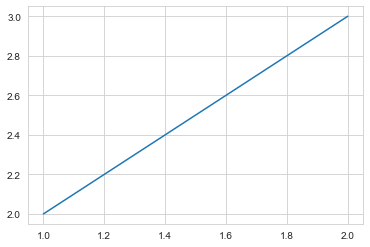

In [35]:
plt.plot([1,2],[2,3])
plt.show()